<a href="https://colab.research.google.com/github/davidlealo/sic_ai_2025_sept/blob/main/3_machine_learning/clase_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Procesamiento de datos categóricos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [7]:
df = pd.DataFrame([['green', 'M', 10.1, 'class2'],
                   ['red', 'L', 13.5, 'class1'],
                   ['blue', 'XL', 15.3, 'class2']])

In [3]:
df

,0,1,2,3
0,green,M,10.1,class2
1,red,L,13.5,class1
2,blue,XL,15.3,class2


In [5]:
size_mapping = {'XL': 3,
                'L': 2,
                'M': 1}

In [8]:
df.columns=['color', 'size', 'price', 'classlabel']

In [9]:
df

,color,size,price,classlabel
0,green,M,10.1,class2
1,red,L,13.5,class1
2,blue,XL,15.3,class2


In [10]:
df['size']

,size
0,M
1,L
2,XL


# La función map() en Python

https://www.w3schools.com/python/ref_func_map.asp





## Definición
`map()` es una función incorporada en Python que aplica una función a cada elemento de uno o más iterables y devuelve un iterador con los resultados.

---

## Sintaxis

```python
map(function, iterable, ...)
```

- **function**: la función que se aplicará a los elementos.
- **iterable, ...**: uno o más iterables (listas, tuplas, etc.).

---

## Funcionamiento paso a paso

1. Se define una función que transforma un valor.
2. `map()` recorre los elementos de los iterables.
3. Aplica la función a cada elemento.
4. Devuelve un iterador con los resultados.

---

## Ejemplo con un iterable

```python
def cuadrado(x):
    return x ** 2

numeros = [1, 2, 3, 4]
resultado = map(cuadrado, numeros)
print(list(resultado))  # [1, 4, 9, 16]
```

**Explicación gráfica:**

```
[1, 2, 3, 4] → map(cuadrado) → [1, 4, 9, 16]
```

---

## Ejemplo con dos iterables

```python
def sumar(a, b):
    return a + b

lista1 = [1, 2, 3]
lista2 = [10, 20, 30]
resultado = map(sumar, lista1, lista2)
print(list(resultado))  # [11, 22, 33]
```

**Explicación gráfica:**

```
lista1: [1, 2, 3]
lista2: [10, 20, 30]

map(sumar, lista1, lista2) → [11, 22, 33]
```

---

## Ventajas y consideraciones

- `map()` devuelve un iterador, eficiente en memoria.
- Es más conciso que un bucle `for`.
- Puede usarse con varios iterables simultáneamente.
- Si solo se trabaja con un iterable, a veces una list comprehension es más legible.

---

## Resumen

- `map()` aplica una función a cada elemento de uno o más iterables.
- Devuelve un iterador que se puede convertir en lista, tupla, etc.
- Útil para transformar datos de manera concisa y eficiente.


**Explicación gráfica (ASCII):**

```
[1, 2, 3, 4]   <-- iterable de entrada
     │
     ▼
 ┌───────────┐
 │   map()   │  (aplica la función "cuadrado" a cada elemento)
 └───────────┘
     │
     ▼
cuadrado(1) → 1
cuadrado(2) → 4
cuadrado(3) → 9
cuadrado(4) → 16
     │
     ▼
[1, 4, 9, 16]  <-- iterador de salida (convertido a lista)
```

---

## Ejemplo con dos iterables

```python
def sumar(a, b):
    return a + b

lista1 = [1, 2, 3]
lista2 = [10, 20, 30]
resultado = map(sumar, lista1, lista2)
print(list(resultado))  # [11, 22, 33]
```

**Explicación gráfica (ASCII):**

```
lista1: [ 1,  2,  3 ]
lista2: [10, 20, 30 ]
     │       │
     ▼       ▼
 ┌──────────────────┐
 │      map()        │  (aplica "sumar" a los pares correspondientes)
 └──────────────────┘
     │
     ▼
sumar(1,10) → 11
sumar(2,20) → 22
sumar(3,30) → 33
     │
     ▼
[11, 22, 33]
```

---

## Diagrama de flujo (Mermaid)

Si el renderizador de Markdown soporta Mermaid, el siguiente bloque mostrará el diagrama de flujo:

```mermaid
flowchart TD
    A[Iterable de entrada] --> B[map()]
    B --> C[Aplicar función a cada elemento]
    C --> D[Iterador de salida]
    subgraph Ejemplo con dos iterables
      E1[Iterable A] --> M(map)
      E2[Iterable B] --> M
      M --> R[Resultados pares aplicados]
    end
```

---

In [11]:
df['size']=df['size'].map(size_mapping)

In [12]:
df['size']

,size
0,1
1,2
2,3


In [13]:
df

,color,size,price,classlabel
0,green,1,10.1,class2
1,red,2,13.5,class1
2,blue,3,15.3,class2


In [14]:
df['classlabel']

,classlabel
0,class2
1,class1
2,class2


In [15]:
df['classlabel'].value_counts()

,count
classlabel,
class2,2
class1,1


In [16]:
np.unique(df['classlabel'])

array(['class1', 'class2'], dtype=object)

In [29]:
enumerate(np.unique(df['classlabel']))

In [18]:
for idx, label in enumerate(np.unique(df['classlabel'])):
    print(idx, label)

0 class1
1 class2


In [19]:
{label: idx for idx, label in enumerate(np.unique(df['classlabel']))}

{'class1': 0, 'class2': 1}

In [20]:
class_mapping={label: idx for idx, label in enumerate(np.unique(df['classlabel']))}

In [21]:
class_mapping

{'class1': 0, 'class2': 1}

In [22]:
df['classlabel']=df['classlabel'].map(class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,1
1,red,2,13.5,0
2,blue,3,15.3,1


## Formas de trabajar datos categóricos

1) Variables dummy: genero una tabla con una variable por elemento distnto y que completo con 0 ó 1 si encuentro la presencia de ese elemento



---

| green | red | blue | Size | Value | Class  |
|-------|-----|------|------|-------|--------|
| 1     | 0   | 0    | M    | 10.1  | class2 |
| 0     | 1   | 0    | L    | 13.5  | class1 |
| 0     | 0   | 1    | XL   | 15.3  | class2 |


Pero existe otra manera que es usada en algoritmos basados en árboles de decisión y derivados (como Random Forests, XGBoost, LightGBM, CatBoost), porque:

- Estos modelos no asumen orden lineal en los números (el valor 0, 1, 2 solo sirve como identificador de categorías).

- Los árboles pueden dividir por condiciones del tipo "feature ≤ valor" sin problema, por lo que aunque pongas M=0, L=1, XL=2, el árbol no interpreta que XL > L tiene un significado "numérico real", sino que solo usa los cortes para particionar.

Entonces ahí podemos usar el label encoding:

In [4]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# DataFrame original
data = {
    "Color": ["green", "red", "blue"],
    "Size": ["M", "L", "XL"],
    "Value": [10.1, 13.5, 15.3],
    "Class": ["class2", "class1", "class2"]
}

df = pd.DataFrame(data)
print("Original:")
print(df, "\n")

# Crear label encoders
le_color = LabelEncoder()
le_size = LabelEncoder()

# Aplicar label encoding
df["Color_encoded"] = le_color.fit_transform(df["Color"])
df["Size_encoded"] = le_size.fit_transform(df["Size"])

print("Con Label Encoding:")
print(df)


Original:
   Color Size  Value   Class
0  green    M   10.1  class2
1    red    L   13.5  class1
2   blue   XL   15.3  class2 

Con Label Encoding:
   Color Size  Value   Class  Color_encoded  Size_encoded
0  green    M   10.1  class2              1             1
1    red    L   13.5  class1              2             0
2   blue   XL   15.3  class2              0             2


In [23]:
df = pd.DataFrame([['green', 'M', 10.1, 'class2'],
                   ['red', 'L', 13.5, 'class1'],
                   ['blue', 'XL', 15.3, 'class2']])
df.columns=['color', 'size', 'price', 'classlabel']

In [24]:
df

,color,size,price,classlabel
0,green,M,10.1,class2
1,red,L,13.5,class1
2,blue,XL,15.3,class2


Revisar: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

In [30]:
from sklearn.preprocessing import LabelEncoder

In [31]:
enc=LabelEncoder()

In [32]:
y=enc.fit_transform(df['classlabel'].values)

In [33]:
y

array([1, 0, 1])

### Uso de OHE

In [34]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import OneHotEncoder

In [35]:
iris = load_iris()

In [36]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [37]:
iris=pd.DataFrame(iris.target, columns=['species'])

In [40]:
iris

,species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [41]:
iris['species'].replace({0:'setosa', 1:'versicolor', 2:'virginica'}, inplace=True)

# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html

In [42]:
pd.get_dummies(iris['species'])

,setosa,versicolor,virginica
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False
...,...,...,...
145,False,False,True
146,False,False,True
147,False,False,True
148,False,False,True


In [43]:
from sklearn.preprocessing import OneHotEncoder

# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

In [44]:
onehot_encoder=OneHotEncoder()

In [45]:
len_iris=len(iris['species'])

In [46]:
len_iris

150

In [47]:
np.array(iris['species'])

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolo

In [ ]:
iris_species_2d=np.array(iris['species']).reshape(len_iris, 1)

iris_species_2d

In [49]:
onehot_encoder.fit_transform(iris_species_2d)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 150 stored elements and shape (150, 3)>

In [51]:
onehot_reshaped=onehot_encoder.fit_transform(iris_species_2d)

In [52]:
onehot_reshaped

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 150 stored elements and shape (150, 3)>

In [56]:
print(onehot_reshaped[0:50])

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 50 stored elements and shape (50, 3)>
  Coords	Values
  (0, 0)	1.0
  (1, 0)	1.0
  (2, 0)	1.0
  (3, 0)	1.0
  (4, 0)	1.0
  (5, 0)	1.0
  (6, 0)	1.0
  (7, 0)	1.0
  (8, 0)	1.0
  (9, 0)	1.0
  (10, 0)	1.0
  (11, 0)	1.0
  (12, 0)	1.0
  (13, 0)	1.0
  (14, 0)	1.0
  (15, 0)	1.0
  (16, 0)	1.0
  (17, 0)	1.0
  (18, 0)	1.0
  (19, 0)	1.0
  (20, 0)	1.0
  (21, 0)	1.0
  (22, 0)	1.0
  (23, 0)	1.0
  (24, 0)	1.0
  (25, 0)	1.0
  (26, 0)	1.0
  (27, 0)	1.0
  (28, 0)	1.0
  (29, 0)	1.0
  (30, 0)	1.0
  (31, 0)	1.0
  (32, 0)	1.0
  (33, 0)	1.0
  (34, 0)	1.0
  (35, 0)	1.0
  (36, 0)	1.0
  (37, 0)	1.0
  (38, 0)	1.0
  (39, 0)	1.0
  (40, 0)	1.0
  (41, 0)	1.0
  (42, 0)	1.0
  (43, 0)	1.0
  (44, 0)	1.0
  (45, 0)	1.0
  (46, 0)	1.0
  (47, 0)	1.0
  (48, 0)	1.0
  (49, 0)	1.0


In [54]:
print(onehot_reshaped[50:100])

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 50 stored elements and shape (50, 3)>
  Coords	Values
  (0, 1)	1.0
  (1, 1)	1.0
  (2, 1)	1.0
  (3, 1)	1.0
  (4, 1)	1.0
  (5, 1)	1.0
  (6, 1)	1.0
  (7, 1)	1.0
  (8, 1)	1.0
  (9, 1)	1.0
  (10, 1)	1.0
  (11, 1)	1.0
  (12, 1)	1.0
  (13, 1)	1.0
  (14, 1)	1.0
  (15, 1)	1.0
  (16, 1)	1.0
  (17, 1)	1.0
  (18, 1)	1.0
  (19, 1)	1.0
  (20, 1)	1.0
  (21, 1)	1.0
  (22, 1)	1.0
  (23, 1)	1.0
  (24, 1)	1.0
  (25, 1)	1.0
  (26, 1)	1.0
  (27, 1)	1.0
  (28, 1)	1.0
  (29, 1)	1.0
  (30, 1)	1.0
  (31, 1)	1.0
  (32, 1)	1.0
  (33, 1)	1.0
  (34, 1)	1.0
  (35, 1)	1.0
  (36, 1)	1.0
  (37, 1)	1.0
  (38, 1)	1.0
  (39, 1)	1.0
  (40, 1)	1.0
  (41, 1)	1.0
  (42, 1)	1.0
  (43, 1)	1.0
  (44, 1)	1.0
  (45, 1)	1.0
  (46, 1)	1.0
  (47, 1)	1.0
  (48, 1)	1.0
  (49, 1)	1.0


In [55]:
print(onehot_reshaped[100:])

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 50 stored elements and shape (50, 3)>
  Coords	Values
  (0, 2)	1.0
  (1, 2)	1.0
  (2, 2)	1.0
  (3, 2)	1.0
  (4, 2)	1.0
  (5, 2)	1.0
  (6, 2)	1.0
  (7, 2)	1.0
  (8, 2)	1.0
  (9, 2)	1.0
  (10, 2)	1.0
  (11, 2)	1.0
  (12, 2)	1.0
  (13, 2)	1.0
  (14, 2)	1.0
  (15, 2)	1.0
  (16, 2)	1.0
  (17, 2)	1.0
  (18, 2)	1.0
  (19, 2)	1.0
  (20, 2)	1.0
  (21, 2)	1.0
  (22, 2)	1.0
  (23, 2)	1.0
  (24, 2)	1.0
  (25, 2)	1.0
  (26, 2)	1.0
  (27, 2)	1.0
  (28, 2)	1.0
  (29, 2)	1.0
  (30, 2)	1.0
  (31, 2)	1.0
  (32, 2)	1.0
  (33, 2)	1.0
  (34, 2)	1.0
  (35, 2)	1.0
  (36, 2)	1.0
  (37, 2)	1.0
  (38, 2)	1.0
  (39, 2)	1.0
  (40, 2)	1.0
  (41, 2)	1.0
  (42, 2)	1.0
  (43, 2)	1.0
  (44, 2)	1.0
  (45, 2)	1.0
  (46, 2)	1.0
  (47, 2)	1.0
  (48, 2)	1.0
  (49, 2)	1.0


### Ejercicio individual

In [57]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',
                      header=None)

In [58]:
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']

In [60]:
df_wine['Class label'].unique()

array([1, 2, 3])

In [61]:
df_wine

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [ ]:
'''
1) EDA
2) Análisis estadístico
3) Hacer la división de los datos (X_train, X_test, y_train, y_test) semilla de 2025
4) Importar las libraries de sklearn de los algoritmos de RL, Tree y RF
5) Importar las métricas también sklearn https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html#sklearn.metrics.classification_report
6) Hacel el proceso de la API de sklearn: instancia del modelo, ajuste del modelo (fit) y predicción
7) Aplicar las métricas
8) Concluir ¿Cuál es el mejor modelo para clasificar los tipos de vino?

'''

# Escaladores en Scikit-learn

Cuando trabajamos con Machine Learning, es común que los datos tengan diferentes escalas.  
Algunos algoritmos son sensibles a estas diferencias (ej.: regresión logística, SVM, KNN, redes neuronales).  
Por eso es importante **escalar** o **normalizar** los datos antes de entrenar los modelos.

Scikit-learn ofrece varias técnicas de escalado: **MinMaxScaler, StandardScaler, RobustScaler y MaxAbsScaler**.

---

## 1. MinMaxScaler
- **Definición**: Escala los datos en un rango específico (por defecto `[0, 1]`).
- **Fórmula**:  
$$
X_{scaled} = \frac{X - X_{min}}{X_{max} - X_{min}}
$$
- **Cuándo usarlo**:
  - Cuando queremos que todas las variables estén dentro de un rango fijo (útil en redes neuronales).
- **Desventaja**: Muy sensible a valores atípicos (*outliers*).

---

## 2. StandardScaler
- **Definición**: Transforma los datos para que tengan **media 0** y **desviación estándar 1**.
- **Fórmula**:  
$$
X_{scaled} = \frac{X - \mu}{\sigma}
$$
- **Cuándo usarlo**:
  - Datos con distribución aproximadamente normal.
  - Algoritmos que asumen normalidad (regresión logística, PCA, SVM).
- **Desventaja**: Sensible a outliers.

---

## 3. RobustScaler
- **Definición**: Escala los datos usando la **mediana** y el **rango intercuartílico (IQR)**.
- **Fórmula**:  
$$
X_{scaled} = \frac{X - \text{mediana}(X)}{IQR}, \quad IQR = Q3 - Q1
$$
- **Cuándo usarlo**:
  - Datos con outliers.
- **Desventaja**: No limita el rango a [0, 1].

---

## 4. MaxAbsScaler
- **Definición**: Escala los datos dividiendo por el **valor absoluto máximo**, preservando el signo.
- **Fórmula**:  
$$
X_{scaled} = \frac{X}{|X_{max}|}
$$
- **Cuándo usarlo**:
  - Cuando los datos están centrados en 0.
  - Cuando queremos mantener sparsity (útil para matrices dispersas como TF-IDF).
- **Desventaja**: No elimina outliers.

---

## Ejemplo en Python

```python
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, MaxAbsScaler

# Datos de ejemplo
data = {
    'Feature1': [10, 20, 30, 40, 1000],
    'Feature2': [1, 2, 3, 4, 5]
}
df = pd.DataFrame(data)
print("Datos originales:\n", df)

# MinMaxScaler
df['MinMax'] = MinMaxScaler().fit_transform(df[['Feature1']])

# StandardScaler
df['Standard'] = StandardScaler().fit_transform(df[['Feature1']])

# RobustScaler
df['Robust'] = RobustScaler().fit_transform(df[['Feature1']])

# MaxAbsScaler
df['MaxAbs'] = MaxAbsScaler().fit_transform(df[['Feature1']])

print("\nDatos escalados:\n", df)



**Resumen**


*   MinMaxScaler: escala a un rango fijo, sensible a outliers.
*   StandardScaler: media 0 y desviación 1, bueno si no hay outliers.
*   RobustScaler: usa mediana e IQR, robusto frente a outliers.

In [62]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# Datos de ejemplo
data = {
    'Feature1': [10, 20, 30, 40, 1000],  # incluye un outlier
    'Feature2': [1, 2, 3, 4, 5]
}
df = pd.DataFrame(data)

print("Datos originales:\n", df)

# MinMaxScaler
minmax = MinMaxScaler()
df['MinMax'] = minmax.fit_transform(df[['Feature1']])

# StandardScaler
standard = StandardScaler()
df['Standard'] = standard.fit_transform(df[['Feature1']])

# RobustScaler
robust = RobustScaler()
df['Robust'] = robust.fit_transform(df[['Feature1']])

print("\nDatos escalados:\n", df)

Datos originales:
    Feature1  Feature2
0        10         1
1        20         2
2        30         3
3        40         4
4      1000         5

Datos escalados:
    Feature1  Feature2    MinMax  Standard  Robust
0        10         1  0.000000 -0.538285    -1.0
1        20         2  0.010101 -0.512652    -0.5
2        30         3  0.020202 -0.487019     0.0
3        40         4  0.030303 -0.461387     0.5
4      1000         5  1.000000  1.999343    48.5


## 1. MinMaxScaler
$$
X_{scaled} = \frac{X - X_{min}}{X_{max} - X_{min}}
$$

## 2. StandardScaler
$$
X_{scaled} = \frac{X - \mu}{\sigma}
$$

## 3. RobustScaler
$$
X_{scaled} = \frac{X - \text{mediana}(X)}{IQR}
\quad \text{donde } IQR = Q3 - Q1
$$


![Sesgo y varianza](https://bookdown.org/victor_morales/TecnicasML/images/14_fig1.png)

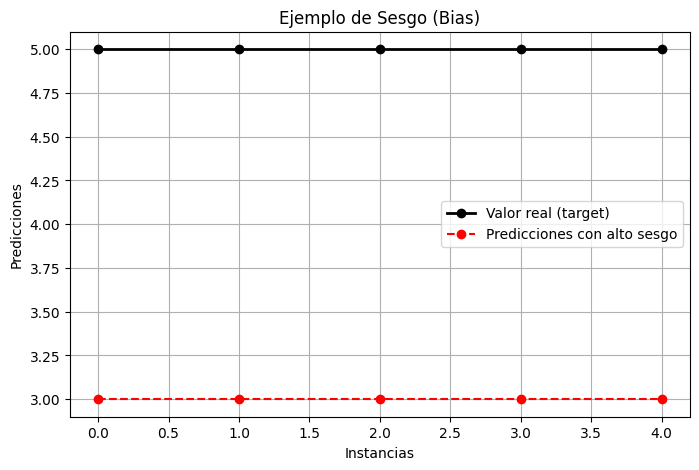

In [64]:
import matplotlib.pyplot as plt
import numpy as np

# Target ideal
target = np.array([5, 5, 5, 5, 5])

# Predicciones con alto sesgo (underfitting)
high_bias = np.array([3, 3, 3, 3, 3])

x = np.arange(len(target))

plt.figure(figsize=(8,5))

# Plot del objetivo
plt.plot(x, target, 'k-o', label='Valor real (target)', linewidth=2)

# Plot de predicciones con alto sesgo
plt.plot(x, high_bias, 'r--o', label='Predicciones con alto sesgo')

plt.title('Ejemplo de Sesgo (Bias)')
plt.xlabel('Instancias')
plt.ylabel('Predicciones')
plt.legend()
plt.grid(True)
plt.show()


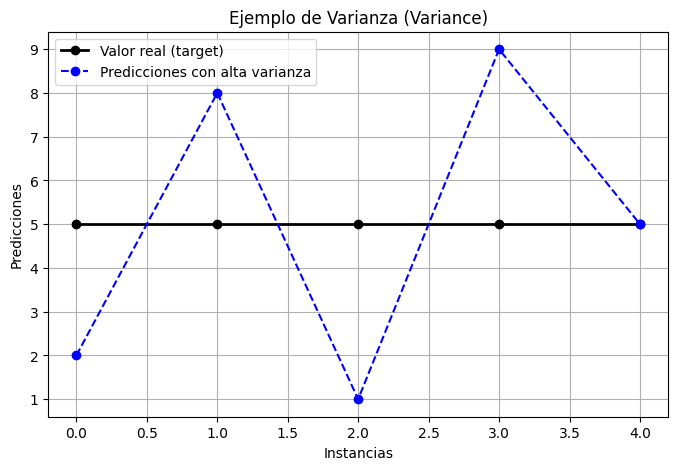

In [65]:
# Predicciones con alta varianza (overfitting)
high_variance = np.array([2, 8, 1, 9, 5])

plt.figure(figsize=(8,5))

# Plot del objetivo
plt.plot(x, target, 'k-o', label='Valor real (target)', linewidth=2)

# Plot de predicciones con alta varianza
plt.plot(x, high_variance, 'b--o', label='Predicciones con alta varianza')

plt.title('Ejemplo de Varianza (Variance)')
plt.xlabel('Instancias')
plt.ylabel('Predicciones')
plt.legend()
plt.grid(True)
plt.show()


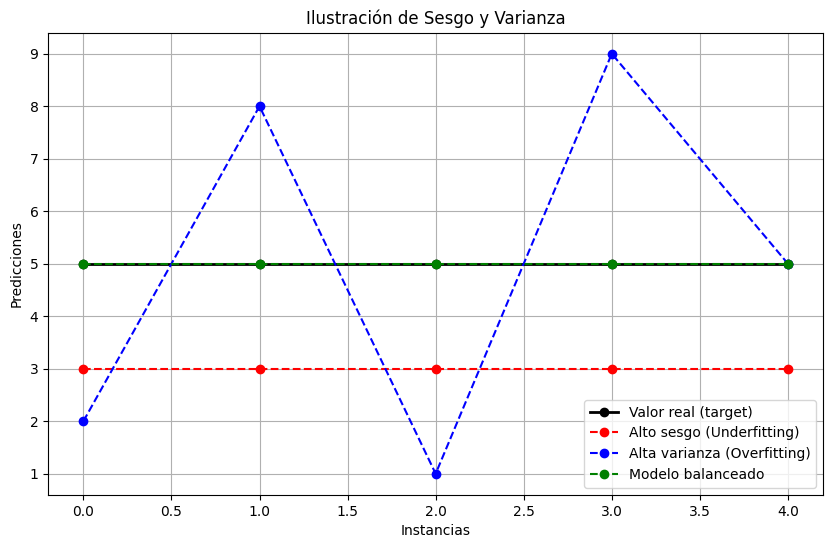

In [63]:
import matplotlib.pyplot as plt
import numpy as np

# Creamos un "objetivo" (target) para ilustrar
target = np.array([5, 5, 5, 5, 5])

# Predicciones simuladas para diferentes escenarios
high_bias = np.array([3, 3, 3, 3, 3])     # Underfitting
high_variance = np.array([2, 8, 1, 9, 5]) # Overfitting
good_model = np.array([5, 5, 5, 5, 5])    # Buen ajuste

x = np.arange(len(target))

plt.figure(figsize=(10,6))

# Plot del objetivo
plt.plot(x, target, 'k-o', label='Valor real (target)', linewidth=2)

# Plots de predicciones
plt.plot(x, high_bias, 'r--o', label='Alto sesgo (Underfitting)')
plt.plot(x, high_variance, 'b--o', label='Alta varianza (Overfitting)')
plt.plot(x, good_model, 'g--o', label='Modelo balanceado')

plt.title('Ilustración de Sesgo y Varianza')
plt.xlabel('Instancias')
plt.ylabel('Predicciones')
plt.legend()
plt.grid(True)
plt.show()


# Regularización en Machine Learning: L1 y L2

En Machine Learning, la **regularización** es una técnica para **prevenir overfitting** penalizando los coeficientes del modelo.  
Los métodos más comunes son **L1 (Lasso)** y **L2 (Ridge)**.

---

## 1. Regularización L1 (Lasso)
- **Definición:** Penaliza la suma de los valores absolutos de los coeficientes.
- **Fórmula de la función de pérdida con L1:**  
$$
\text{Loss}_{L1} = \text{MSE} + \lambda \sum_{i=1}^{n} |w_i|
$$
  - `MSE`: error cuadrático medio.  
  - `w_i`: coeficientes del modelo.  
  - `λ` (lambda): fuerza de la regularización.
- **Efecto principal:**
  - Puede **reducir coeficientes exactamente a cero** → genera **modelos esparsos**.
- **Cuándo usar:**
  - Cuando queremos **selección de variables automática**.
- **Desventaja:** Puede ser inestable si las variables están muy correlacionadas.

---

## 2. Regularización L2 (Ridge)
- **Definición:** Penaliza la suma de los **cuadrados** de los coeficientes.
- **Fórmula de la función de pérdida con L2:**  
$$
\text{Loss}_{L2} = \text{MSE} + \lambda \sum_{i=1}^{n} w_i^2
$$
- **Efecto principal:**
  - No anula coeficientes, pero **los reduce**.
  - Hace que los coeficientes grandes sean más pequeños, mejorando la **generalización**.
- **Cuándo usar:**
  - Cuando queremos **reducir sobreajuste** pero mantener todas las variables.
- **Desventaja:** No realiza selección de variables.

---

## 3. Comparación L1 vs L2
| Característica         | L1 (Lasso)            | L2 (Ridge)           |
|------------------------|----------------------|---------------------|
| Penalización           | Suma de valores absolutos | Suma de cuadrados     |
| Coeficientes a cero    | Sí                    | No                  |
| Selección de variables | Sí                    | No                  |
| Uso típico             | Sparsity, selección de features | Reducir overfitting sin eliminar features |

---

## 4. Ejemplo en Python

```python
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.datasets import make_regression

# Datos de ejemplo
X, y = make_regression(n_samples=100, n_features=5, noise=10, random_state=42)

# Modelo sin regularización
lr = LinearRegression().fit(X, y)

# Modelo con L1
lasso = Lasso(alpha=0.1).fit(X, y)

# Modelo con L2
ridge = Ridge(alpha=0.1).fit(X, y)

print("Coeficientes sin regularización:", lr.coef_)
print("Coeficientes L1 (Lasso):", lasso.coef_)
print("Coeficientes L2 (Ridge):", ridge.coef_)


## Ejercicio con validación cruzada

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [38]:
from sklearn.datasets import load_iris
data=load_iris()
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [39]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [40]:
iris=pd.DataFrame(data=data.data, columns=data.feature_names)
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [41]:
target=pd.DataFrame(data.target, columns=["species"])

In [42]:
feature=pd.DataFrame(data=data.data, columns=data.feature_names)

In [43]:
iris = pd.concat([feature, target], axis=1)

iris.rename({"sepal length (cm)":"sepal_length", "sepal width (cm)":"sepal_width",
             "petal length (cm)":"petal_length", "petal width (cm)":"petal_width"},
            axis=1, inplace=True)
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test=train_test_split(iris.iloc[:,:-1], iris.iloc[:,-1],
                                                  test_size=0.33, random_state=42)

In [46]:
from sklearn.tree import DecisionTreeClassifier

In [47]:
model = DecisionTreeClassifier(criterion='gini',splitter='best',max_depth=None,min_samples_split=2,
                               min_samples_leaf=1,min_weight_fraction_leaf=0.0,max_features=None,
                               random_state=42,max_leaf_nodes=None,min_impurity_decrease=0.0,
                               class_weight=None)

In [48]:
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [49]:
model.score(X_test, y_test)

0.98

# Diferencia entre K-Fold y Stratified K-Fold

En Machine Learning, al entrenar modelos, a menudo usamos **validación cruzada (cross-validation)** para evaluar el desempeño del modelo de manera más robusta.
Dos técnicas comunes son **K-Fold** y **Stratified K-Fold**.

---

## 1. K-Fold Cross-Validation

* **Definición:** Divide los datos en `k` partes (folds) de tamaño aproximadamente igual.
* El modelo se entrena `k` veces, cada vez usando un fold como conjunto de prueba y los restantes como entrenamiento.
* **Ventaja:** Evalúa el modelo de forma robusta usando todos los datos como entrenamiento y prueba.
* **Desventaja:**

  * Si las clases están desbalanceadas, algunos folds pueden contener **muy pocas muestras de ciertas clases**, lo que puede afectar la evaluación.

**Ejemplo visual:**

```
Datos: [A, A, A, B, B, B, B, C, C]
K=3 folds
Fold 1: [A,A,B]  Train: [A,B,B,C,C]
Fold 2: [A,B,B]  Train: [A,A,B,C,C]
Fold 3: [A,B,C,C] Train: [A,A,B,B,B]
```

---

## 2. Stratified K-Fold

* **Definición:** Variante de K-Fold que **mantiene la proporción de clases** en cada fold.
* Es decir, cada fold tendrá aproximadamente la misma distribución de clases que el conjunto original.
* **Ventaja:**

  * Muy útil en **clasificación desbalanceada**, garantiza que todos los folds representen correctamente las clases.
* **Desventaja:**

  * Solo se aplica en problemas de clasificación (no en regresión directamente).

**Ejemplo visual:**

```
Datos: [A,A,A,B,B,B,B,C,C]
K=3 folds, stratified
Fold 1: [A,B,B]  Train: [A,A,B,C,C,B]
Fold 2: [A,B,B]  Train: [A,A,B,C,C,B]
Fold 3: [A,B,C]  Train: [A,A,B,B,C,B]
```

> Cada fold mantiene aproximadamente la misma proporción de clases que el dataset completo.

---

## 3. Ejemplo en Python

```python
from sklearn.model_selection import KFold, StratifiedKFold
import numpy as np

X = np.arange(10).reshape((10,1))
y = [0,0,0,1,1,1,1,2,2,2]

# K-Fold
kf = KFold(n_splits=3, shuffle=True, random_state=42)
print("K-Fold:")
for train_index, test_index in kf.split(X):
    print("Train:", train_index, "Test:", test_index)

# Stratified K-Fold
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
print("\nStratified K-Fold:")
for train_index, test_index in skf.split(X, y):
    print("Train:", train_index, "Test:", test_index)
```

---

**Resumen:**

| Método            | Distribución de clases  | Uso principal                                 |
| ----------------- | ----------------------- | --------------------------------------------- |
| K-Fold            | No garantiza            | General, regresión o clasificación balanceada |
| Stratified K-Fold | Sí, mantiene proporción | Clasificación, especialmente desbalanceada    |


In [50]:
import numpy as np
from sklearn.model_selection import cross_val_score, KFold
cv=KFold(n_splits=10,shuffle=True,random_state=42)
results=cross_val_score(model, X_train, y_train, cv=cv)
fin_result=np.mean(results)

In [51]:
for i, _ in enumerate(results):
    print("{}th cross validation score: {}".format(i, _))
print("\ncross validation final score: {}".format(fin_result))

0th cross validation score: 0.9
1th cross validation score: 1.0
2th cross validation score: 0.8
3th cross validation score: 1.0
4th cross validation score: 0.8
5th cross validation score: 0.9
6th cross validation score: 1.0
7th cross validation score: 0.9
8th cross validation score: 1.0
9th cross validation score: 1.0

cross validation final score: 0.93


In [52]:
from sklearn.model_selection import StratifiedKFold
cv=StratifiedKFold(n_splits=10,shuffle=True,random_state=42)
results=cross_val_score(model, X_train, y_train, cv=cv)
fin_result=np.mean(results)
for i, _ in enumerate(results):
    print("{}th cross validation score: {}".format(i, _))

0th cross validation score: 0.9
1th cross validation score: 0.9
2th cross validation score: 0.8
3th cross validation score: 0.9
4th cross validation score: 1.0
5th cross validation score: 1.0
6th cross validation score: 0.9
7th cross validation score: 0.8
8th cross validation score: 1.0
9th cross validation score: 1.0


In [53]:
print("\ncross validation final score: {}".format(fin_result))


cross validation final score: 0.9199999999999999


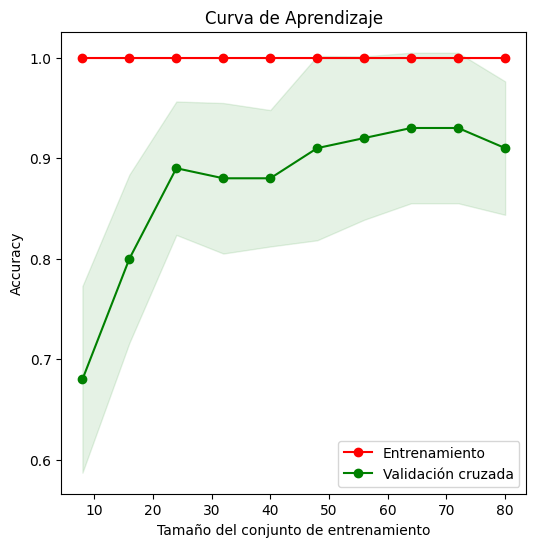

In [54]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve

# ⚡ Generar curvas de aprendizaje directamente con scikit-learn
train_sizes, train_scores, test_scores = learning_curve(
    estimator=model,
    X=X_train,
    y=y_train,
    cv=5,               # validación cruzada (puedes cambiar a 3 o 10)
    n_jobs=-1,          # usar todos los núcleos
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring="accuracy"  # métrica, cámbiala si quieres
)

# Promedios y desviaciones
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std  = np.std(train_scores, axis=1)
test_scores_mean  = np.mean(test_scores, axis=1)
test_scores_std   = np.std(test_scores, axis=1)

# 📊 Graficar
plt.figure(figsize=(6,6))
plt.title("Curva de Aprendizaje")
plt.xlabel("Tamaño del conjunto de entrenamiento")
plt.ylabel("Accuracy")

# Área sombreada (desviación estándar)
plt.fill_between(train_sizes,
                 train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std,
                 alpha=0.1, color="r")
plt.fill_between(train_sizes,
                 test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std,
                 alpha=0.1, color="g")

# Líneas promedio
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Entrenamiento")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Validación cruzada")

plt.legend(loc="best")
plt.show()


# GridSearchCV en Scikit-Learn

## ¿Qué es GridSearchCV?

`GridSearchCV` es una técnica de búsqueda exhaustiva que permite
encontrar los **mejores hiperparámetros** para un modelo de Machine
Learning.\
La idea es que probamos todas las combinaciones posibles de los
parámetros definidos en una cuadrícula (*grid*), y seleccionamos la que
obtiene el mejor desempeño según una métrica definida.

------------------------------------------------------------------------

## ¿Por qué usarlo?

Los modelos de Machine Learning suelen tener **hiperparámetros**
(parámetros que no se ajustan durante el entrenamiento).\
Por ejemplo: - En `KNeighborsClassifier`, el número de vecinos
`n_neighbors`. - En `RandomForestClassifier`, la cantidad de árboles
`n_estimators`.

La elección de estos hiperparámetros puede cambiar radicalmente el
rendimiento del modelo.\
En lugar de probar manualmente, `GridSearchCV` automatiza el proceso.

------------------------------------------------------------------------

## Funcionamiento de GridSearchCV

1.  Se define un **modelo base** (ejemplo: `RandomForestClassifier()`).
2.  Se especifica un **diccionario de parámetros** con los valores a
    probar.
3.  Se ejecuta una **validación cruzada** para cada combinación de
    parámetros.
4.  Se selecciona la mejor combinación según la métrica de evaluación.

------------------------------------------------------------------------

## Ejemplo paso a paso

``` python
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# 1. Cargar dataset
iris = load_iris()
X, y = iris.data, iris.target

# 2. Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Definir el modelo
model = RandomForestClassifier(random_state=42)

# 4. Definir la cuadrícula de hiperparámetros
param_grid = {
    'n_estimators': [50, 100, 200],      # número de árboles
    'max_depth': [None, 5, 10],          # profundidad máxima
    'min_samples_split': [2, 5, 10]      # mínimo de muestras para dividir
}

# 5. Configurar GridSearchCV
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,                # validación cruzada en 5 pliegues
    scoring='accuracy',  # métrica de evaluación
    n_jobs=-1            # usar todos los núcleos disponibles
)

# 6. Ajustar a los datos de entrenamiento
grid_search.fit(X_train, y_train)

# 7. Resultados
print("Mejores parámetros encontrados:", grid_search.best_params_)
print("Mejor puntuación de validación:", grid_search.best_score_)

# 8. Evaluación en datos de prueba
best_model = grid_search.best_estimator_
print("Exactitud en el conjunto de prueba:", best_model.score(X_test, y_test))
```

------------------------------------------------------------------------

## Interpretación de los resultados

-   **`best_params_`**: devuelve la combinación de hiperparámetros que
    produjo el mejor resultado.
-   **`best_score_`**: muestra la puntuación promedio de validación
    cruzada con esos hiperparámetros.
-   **`best_estimator_`**: permite acceder directamente al modelo
    entrenado con la mejor configuración.

------------------------------------------------------------------------

## Ventajas de GridSearchCV

-   Explora de manera **sistemática** todas las combinaciones.
-   Usa **validación cruzada** para mayor robustez.
-   Se integra directamente con modelos de Scikit-Learn.

------------------------------------------------------------------------

## Limitaciones

-   Puede ser **computacionalmente costoso** si el número de
    combinaciones es muy grande.
-   Para problemas con muchos hiperparámetros, a veces es mejor usar
    **RandomizedSearchCV**, que prueba combinaciones de forma aleatoria
    en lugar de todas.

------------------------------------------------------------------------


In [55]:
estimator=DecisionTreeClassifier()
from sklearn.model_selection import GridSearchCV
parameters={'max_depth': [4,6,8,10,12],
            'criterion': ['gini', 'entropy'],
            'splitter': ['best', 'random'],
            'min_weight_fraction_leaf': [0.0,0.1,0.2,0.3],
            'random_state': [7,23,42,78,142],
            'min_impurity_decrease': [0.0,0.05,0.1,0.2]}
model2=GridSearchCV(estimator=estimator,
                    param_grid=parameters,
                    cv=KFold(10), verbose=1,
                    n_jobs=-1, refit=True)
model2.fit(X_train, y_train)

Fitting 10 folds for each of 1600 candidates, totalling 16000 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 8, 10, 12],
                         'min_impurity_decrease': [0.0, 0.05, 0.1, 0.2],
                         'min_weight_fraction_leaf': [0.0, 0.1, 0.2, 0.3],
                         'random_state': [7, 23, 42, 78, 142],
                         'splitter': ['best', 'random']},
             verbose=1)

# Hiperparámetros de `DecisionTreeClassifier` y configuración de `GridSearchCV`

## 1) Hiperparámetros del árbol

### `max_depth`

-   **Qué hace:** limita la **profundidad máxima** del árbol (número de
    niveles).\
-   **Impacto:**
    -   Valores **bajos** → más sesgo, menos varianza (modelo simple,
        menor sobreajuste).\
    -   Valores **altos** → menos sesgo, más varianza (riesgo de
        sobreajuste).\
-   **Notas prácticas:** si tus datos son ruidosos, no conviene dejarlo
    ilimitado (`None`). El rango `[4, 6, 8, 10, 12]` es razonable para
    empezar.

------------------------------------------------------------------------

### `criterion` (`'gini'`, `'entropy'`)

-   **Qué hace:** define la **función de impureza** usada para elegir la
    mejor partición en cada nodo.
    -   `'gini'`: índice de Gini. Suele ser **ligeramente más rápido**.\
    -   `'entropy'`: entropía (equivalente teórico a minimizar
        **log-loss**).\
-   **Compatibilidad (importante):** en versiones recientes de
    scikit-learn, `entropy` puede estar **deprecado** a favor de
    `'log_loss'`. Si ves advertencias, usa `'gini'` y `'log_loss'`.
-   **Impacto:** diferencias de rendimiento suelen ser pequeñas;
    prioriza estabilidad y ausencia de warnings.

------------------------------------------------------------------------

### `splitter` (`'best'`, `'random'`)

-   **Qué hace:** estrategia de selección de **división** en cada nodo.
    -   `'best'`: elige la mejor división **determinística** según el
        `criterion`.\
    -   `'random'`: elige una división **aleatoria** (entre buenas
        candidatas); útil para **diversificar** árboles, por ejemplo en
        ensambles.\
-   **Impacto:** `'random'` introduce **aleatoriedad**; requiere fijar
    `random_state` si buscas **reproducibilidad**. Para un solo árbol,
    normalmente `'best'` funciona mejor.

------------------------------------------------------------------------

### `min_weight_fraction_leaf`

-   **Qué hace:** exige que cada **hoja** contenga al menos esta
    **fracción del peso total** de las muestras.
    -   Si no pasas `sample_weight`, todas las muestras pesan 1 y esta
        fracción aplica sobre el **número** de muestras.\
-   **Impacto:** valores más altos **podan** hojas con pocas muestras,
    reduciendo sobreajuste.\
-   **Notas prácticas:**
    -   Valores como `0.0` (sin restricción), `0.1`, `0.2`, `0.3` son
        agresivos al podar; empieza bajo (`0.0`--`0.05`) y sube si hay
        sobreajuste.\
    -   En datasets pequeños, `0.2` o `0.3` pueden ser demasiado
        restrictivos.

------------------------------------------------------------------------

### `min_impurity_decrease`

-   **Qué hace:** realiza una división **solo si** la **disminución de
    impureza** es al menos este valor.\
-   **Impacto:** cuanto mayor sea, **menos** divisiones se aceptan →
    **árbol más simple**.\
-   **Notas prácticas:** empieza con `0.0` y prueba valores pequeños
    como `0.0001`, `0.001`, `0.01`. Valores grandes (`0.1`, `0.2`)
    suelen **podar demasiado** salvo que tu impureza sea muy alta.

------------------------------------------------------------------------

### `random_state`

-   **Qué hace:** fija la **semilla aleatoria** usada por el algoritmo
    cuando hay aleatoriedad (por ejemplo, con `splitter='random'` o para
    desempates).\
-   **Impacto:** asegura **reproducibilidad**.\
-   **Buena práctica:** **no** lo trates como hiperparámetro a
    optimizar; **fíjalo** a un entero para obtener resultados
    comparables. Incluirlo en el grid hará que tu "mejor modelo" dependa
    del azar.

------------------------------------------------------------------------

## 2) Parámetros de `GridSearchCV` en tu configuración

### `cv=KFold(10)`

-   **Qué hace:** usa **validación cruzada** con 10 pliegues.\
-   **Nota importante (clasificación):** para clasificación es **mejor**
    `StratifiedKFold(10)` porque **mantiene la proporción de clases** en
    cada pliegue.\
-   **Cuándo cambiar:** si tus clases están desbalanceadas o el dataset
    es pequeño, cambia a `StratifiedKFold`.

### `n_jobs=-1`

-   **Qué hace:** usa **todos los núcleos** disponibles.\
-   **Impacto:** acelera el grid, especialmente con grids grandes.

### `verbose=1`

-   **Qué hace:** muestra el **progreso** del ajuste.\
-   **Impacto:** útil para diagnósticos; puedes subir a `2` o `3` para
    más detalle.

### `refit=True`

-   **Qué hace:** tras la búsqueda, **reantrena** automáticamente el
    mejor estimador (`best_estimator_`) sobre **todo** el conjunto de
    entrenamiento.\
-   **Impacto:** te deja listo el modelo final (`grid.best_estimator_`)
    para `predict`/`score`.\
-   **Scoring por defecto:** como no especificaste `scoring`, se usa
    `estimator.score` (para clasificación, **accuracy**).

------------------------------------------------------------------------

## 3) Recomendaciones para mejorar tu grid

1.  **No optimizar `random_state`.** Fíjalo (por ejemplo,
    `random_state=42`) para reproducibilidad.\
2.  **Usa `StratifiedKFold` en clasificación.**\
3.  **Ajusta rangos más finos/realistas**:
    -   `min_impurity_decrease`: prueba valores **pequeños**
        (`[0.0, 1e-4, 1e-3, 1e-2]`).\
    -   `min_weight_fraction_leaf`: empieza con
        `[0.0, 0.01, 0.02, 0.05]`.\
4.  **Considera incluir**:
    -   `min_samples_split` (p. ej., `[2, 5, 10]`).\
    -   `min_samples_leaf` (p. ej., `[1, 2, 5, 10]`).\
    -   `max_features` (p. ej., `['sqrt', 'log2', None]`).\
5.  **Compatibilidad del `criterion`:** si ves advertencia por
    `'entropy'`, cambia a `'log_loss'`.

------------------------------------------------------------------------

## 4) Ejemplo de grid actualizado y más robusto

``` python
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
import numpy as np

estimator = DecisionTreeClassifier(
    random_state=42,    # fijar semilla, no optimizarla
)

param_grid = {
    'max_depth': [4, 6, 8, 10, 12],
    'criterion': ['gini', 'log_loss'],
    'splitter': ['best', 'random'],
    'min_weight_fraction_leaf': [0.0, 0.01, 0.02, 0.05],
    'min_impurity_decrease': [0.0, 1e-4, 1e-3, 1e-2],
}

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

grid = GridSearchCV(
    estimator=estimator,
    param_grid=param_grid,
    cv=cv,
    n_jobs=-1,
    verbose=1,
    refit=True,
)

grid.fit(X_train, y_train)

print("Mejores parámetros:", grid.best_params_)
print("Mejor CV score:", grid.best_score_)
best_model = grid.best_estimator_
print("Score en test:", best_model.score(X_test, y_test))
```

------------------------------------------------------------------------

## 5) Interpretación y diagnóstico

-   **`grid.best_params_`**: combinación óptima según la métrica de CV.\
-   **`grid.best_score_`**: media del puntaje de CV en los pliegues con
    esos hiperparámetros.\
-   **`grid.cv_results_`**: diccionario con todo el detalle (tiempos,
    desviaciones, rankings). Puedes convertirlo a DataFrame para
    inspección:

``` python
import pandas as pd

res = pd.DataFrame(grid.cv_results_)
cols = ['rank_test_score', 'mean_test_score', 'std_test_score', 'params']
display(res[cols].sort_values('rank_test_score').head(10))
```

-   **Señales de sobreajuste:** si `train_score` (si lo activas) es muy
    alto y `mean_test_score` bajo, sube la regularización:\
    aumenta `min_impurity_decrease`, `min_weight_fraction_leaf`,
    `min_samples_leaf` o **reduce** `max_depth`.

------------------------------------------------------------------------

### Conclusión

-   Los hiperparámetros clave para controlar el **sesgo-varianza** en
    árboles son `max_depth`, `min_samples_leaf`, `min_samples_split`,
    `min_weight_fraction_leaf` y `min_impurity_decrease`.\
-   Evita optimizar `random_state` y considera `StratifiedKFold` para
    clasificación.\
-   Reemplaza `'entropy'` por `'log_loss'` si tu versión de scikit-learn
    lo recomienda, y mantén rangos **realistas** para los umbrales de
    poda.


In [56]:
model2.best_estimator_

DecisionTreeClassifier(max_depth=4, random_state=23, splitter='random')

In [57]:
model2.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'min_impurity_decrease': 0.0,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 23,
 'splitter': 'random'}

In [58]:
model2.best_score_

np.float64(0.9700000000000001)

In [59]:
from sklearn.metrics import accuracy_score
pred2=model.predict(X_test)
pred2

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 1, 2, 1, 2])

In [60]:
accuracy_score(y_test, pred2)

0.98

In [61]:
from sklearn.metrics import accuracy_score
pred=model2.predict(X_test)
pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 1, 2, 1, 2])

In [62]:
accuracy_score(y_test, pred)

0.98

In [63]:
from sklearn.metrics import confusion_matrix
pred=model2.predict(X_test)
confusion_matrix(y_test, pred)

array([[19,  0,  0],
       [ 0, 15,  0],
       [ 0,  1, 15]])

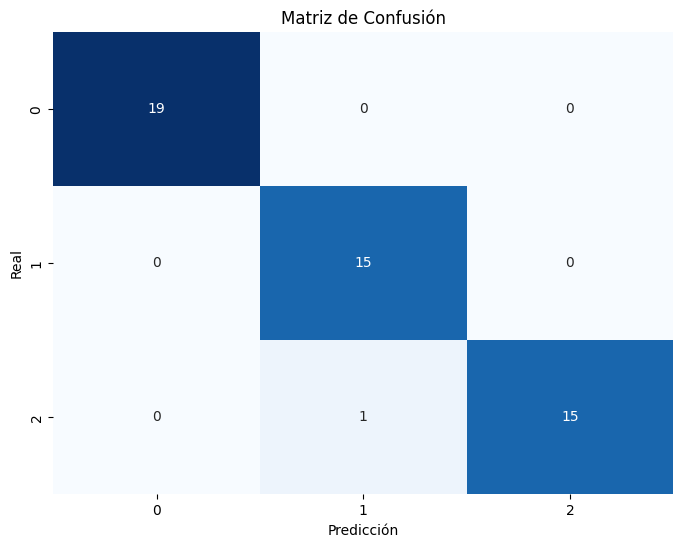

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()


In [65]:
from sklearn.metrics import precision_score
precisions=precision_score(y_test, pred, average=None)

for target, score in zip(data.target_names, precisions):
    print(f"{target} precision: {score}")

setosa precision: 1.0
versicolor precision: 0.9375
virginica precision: 1.0


In [66]:
from sklearn.metrics import recall_score
recalls=recall_score(y_test, pred, average=None)
for target, score in zip(data.target_names, recalls):
    print(f"{target} sensitivity: {score}")

setosa sensitivity: 1.0
versicolor sensitivity: 1.0
virginica sensitivity: 0.9375


In [67]:
from sklearn.metrics import fbeta_score, f1_score

fbetas=fbeta_score(y_test, pred, beta=1, average=None)

for target, score in zip(data.target_names, fbetas):
    print(f"{target} fbetas score: {score}")

f1s=f1_score(y_test, pred, average=None)

for target, score in zip(data.target_names, f1s):
    print(f"{target} f1 score: {score}")

setosa fbetas score: 1.0
versicolor fbetas score: 0.967741935483871
virginica fbetas score: 0.967741935483871
setosa f1 score: 1.0
versicolor f1 score: 0.967741935483871
virginica f1 score: 0.967741935483871


In [68]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.94      1.00      0.97        15
           2       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



# Métricas de Evaluación en Clasificación

Partimos de la **matriz de confusión**:

|                | Predicción Positiva | Predicción Negativa |
|----------------|---------------------|---------------------|
| **Real Positiva** | Verdadero Positivo (TP) | Falso Negativo (FN) |
| **Real Negativa** | Falso Positivo (FP)     | Verdadero Negativo (TN) |

A partir de estos valores definimos:

---

## 1. Accuracy (Exactitud)

Mide la proporción de predicciones correctas:

$$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
$$

---

## 2. Precision (Precisión)

De todas las predicciones positivas, mide cuántas son correctas:

$$
\text{Precision} = \frac{TP}{TP + FP}
$$

---

## 3. Recall (Sensibilidad o Exhaustividad)

De todos los casos realmente positivos, mide cuántos fueron detectados:

$$
\text{Recall} = \frac{TP}{TP + FN}
$$

---

## 4. Fallout (Tasa de Falsos Positivos)

De todos los casos realmente negativos, mide cuántos fueron clasificados como positivos:

$$
\text{Fallout} = \frac{FP}{FP + TN}
$$

---

## 5. F1-Score

Media armónica entre precisión y recall:

$$
F1 = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
$$

---

## Interpretación General

- **Accuracy**: bueno si las clases están balanceadas.  
- **Precision**: útil cuando los **falsos positivos** son costosos.  
- **Recall**: útil cuando los **falsos negativos** son costosos.  
- **Fallout**: mide la tendencia a etiquetar negativos como positivos.  
- **F1**: balance entre **precision** y **recall**, ideal en datasets desbalanceados.


# Ejemplo: Accuracy engañoso en diagnóstico de cáncer

Imaginemos un dataset con **100 pacientes**: - 95 pacientes **sanos**
(clase negativa). - 5 pacientes con **cáncer** (clase positiva).

Un modelo "ingenuo" siempre predice que **todos están sanos**.

------------------------------------------------------------------------

## Matriz de confusión

                     Predicción: Sano   Predicción: Cáncer
  ------------------ ------------------ --------------------
  **Real: Sano**     95 (TN)            0 (FP)
  **Real: Cáncer**   5 (FN)             0 (TP)

------------------------------------------------------------------------

## Cálculo de métricas

**Accuracy:**

$$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN} = \frac{95 + 0}{95 + 0 + 0 + 5} = 0.95
$$

El modelo obtiene **95% de exactitud**.

------------------------------------------------------------------------

**Precision:**

$$
\text{Precision} = \frac{TP}{TP + FP} = \frac{0}{0+0}
$$

Indefinida (se considera 0 en sklearn), porque nunca predice positivo.

------------------------------------------------------------------------

**Recall (Sensibilidad):**

$$
\text{Recall} = \frac{TP}{TP + FN} = \frac{0}{0+5} = 0
$$

El modelo **no detecta ningún cáncer**.

------------------------------------------------------------------------

**Fallout:**

$$
\text{Fallout} = \frac{FP}{FP + TN} = \frac{0}{0+95} = 0
$$

No hay falsos positivos, pero porque nunca arriesga predecir cáncer.

------------------------------------------------------------------------

**F1-Score:**

$$
F1 = 2 \cdot \frac{0 \cdot 0}{0 + 0} = 0
$$

------------------------------------------------------------------------

## Interpretación

-   El **accuracy parece bueno (95%)**, pero el modelo es inútil: **no
    detecta ningún caso de cáncer**.\
-   Esto ocurre porque el dataset está desbalanceado y la métrica de
    accuracy queda dominada por la clase mayoritaria.\
-   En problemas médicos, se prioriza **recall** (sensibilidad), porque
    lo importante es detectar la mayor cantidad posible de casos
    positivos, aunque aumenten los falsos positivos.

------------------------------------------------------------------------

## Ejemplo en Python

``` python
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Datos reales (95 sanos = 0, 5 con cáncer = 1)
y_true = np.array([0]*95 + [1]*5)

# Predicciones: el modelo dice que todos están sanos
y_pred = np.array([0]*100)

# Métricas
print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
print("Accuracy:", accuracy_score(y_true, y_pred))
print("Precision:", precision_score(y_true, y_pred, zero_division=0))
print("Recall:", recall_score(y_true, y_pred))
print("F1 Score:", f1_score(y_true, y_pred))
```

Este ejemplo mostrará: - Accuracy = 0.95\
- Precision = 0.0\
- Recall = 0.0\
- F1 = 0.0

------------------------------------------------------------------------

## Conclusión

Un modelo puede tener **alta accuracy** pero ser inútil en la práctica
si ignora la clase minoritaria.\
Por eso, en contextos como el diagnóstico de cáncer, **recall y F1** son
métricas más adecuadas.


![Curva Roc](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSHKez9UZ_cIrc5YRW0kYGxfivbwprYBH_qSA&s)

In [73]:
pred_proba=model2.predict_proba(X_test)

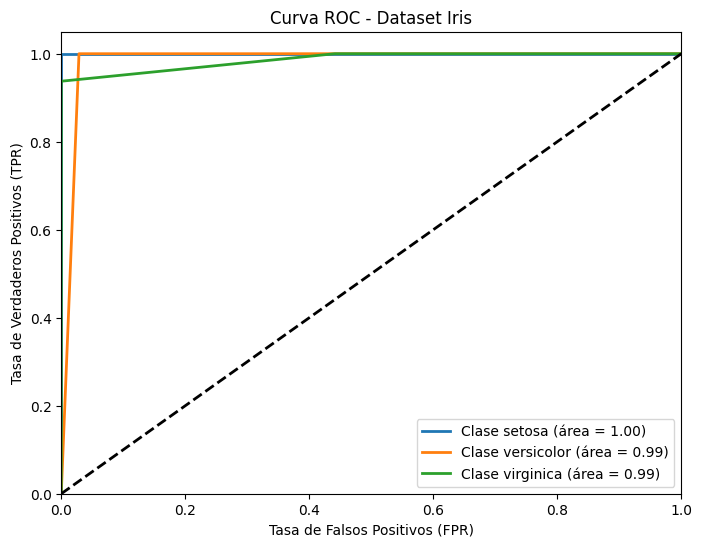

In [76]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc


iris = load_iris()

z = iris.target


n_classes = len(np.unique(z))

y_score = model2.predict_proba(X_test)



y_test_bin = label_binarize(y_test, classes=np.arange(n_classes))



# 6. Graficar curvas ROC por clase
plt.figure(figsize=(8,6))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f"Clase {iris.target_names[i]} (área = {roc_auc:.2f})")

# Línea base
plt.plot([0, 1], [0, 1], "k--", lw=2)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Tasa de Falsos Positivos (FPR)")
plt.ylabel("Tasa de Verdaderos Positivos (TPR)")
plt.title("Curva ROC - Dataset Iris")
plt.legend(loc="lower right")
plt.show()


# Curva ROC (Receiver Operating Characteristic)

La **curva ROC** es una herramienta fundamental para evaluar modelos de clasificación binaria (y extensiones multiclase).  
Muestra gráficamente la relación entre la **tasa de verdaderos positivos (TPR o recall)** y la **tasa de falsos positivos (FPR o fallout)** a distintos umbrales de decisión.

---

## Definiciones

A partir de la matriz de confusión:

- Verdaderos Positivos (TP)  
- Falsos Positivos (FP)  
- Verdaderos Negativos (TN)  
- Falsos Negativos (FN)  

Definimos:

**Tasa de Verdaderos Positivos (TPR o Recall):**

$$
TPR = \frac{TP}{TP + FN}
$$

**Tasa de Falsos Positivos (FPR o Fallout):**

$$
FPR = \frac{FP}{FP + TN}
$$

---

## Construcción de la curva ROC

1. El clasificador genera una **probabilidad** de pertenecer a la clase positiva.  
2. Se varía el **umbral de decisión** desde 1 hasta 0.  
   - Con umbral = 1, todo se predice como negativo.  
   - Con umbral = 0, todo se predice como positivo.  
3. Para cada umbral, se calcula (FPR, TPR).  
4. Al unir estos puntos, se obtiene la **curva ROC**.

---

## Interpretación

- **Clasificador perfecto:** pasa por el punto (0,1).  
- **Clasificador aleatorio:** sigue la diagonal (línea base).  
- **Cuanto más arriba y a la izquierda esté la curva, mejor es el modelo.**

---

## Área bajo la curva (AUC)

El **AUC (Area Under the Curve)** cuantifica el rendimiento del clasificador:

$$
AUC = \int_0^1 TPR(FPR) \, dFPR
$$

- AUC = 1 → modelo perfecto.  
- AUC = 0.5 → modelo equivalente a adivinar al azar.  
- AUC < 0.5 → modelo peor que azar (se puede invertir la decisión).

---

## Ventajas

- Evalúa el modelo **independientemente del umbral**.  
- Útil en datasets **desbalanceados**.  
- Permite comparar clasificadores de manera visual y cuantitativa (AUC).

---

## Ejemplo en Python

```python
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import numpy as np

# Simulación
y_true = np.array([0,0,1,1])
y_scores = np.array([0.1, 0.4, 0.35, 0.8])

fpr, tpr, thresholds = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0,1],[0,1], color="navy", lw=2, linestyle="--")
plt.xlabel("Tasa de Falsos Positivos (FPR)")
plt.ylabel("Tasa de Verdaderos Positivos (TPR)")
plt.title("Curva ROC")
plt.legend(loc="lower right")
plt.show()


In [77]:
import pickle

In [82]:
with open('final_model.pickle', 'wb') as fp:
    pickle.dump(model2, fp)

In [79]:
f=open('final_model.pickle', 'rb')
model3=pickle.load(f)

In [ ]:
predicted_species=model3.predict(iris.iloc[:,:-1])

In [ ]:
iris['predicted_species']=predicted_species
iris.to_csv('FinalResult.csv', index=False)

# Guardar y cargar modelos con Pickle en Python

En Machine Learning, entrenar un modelo puede tomar mucho tiempo.\
Por eso es común **guardar el modelo entrenado** en un archivo para
reutilizarlo sin tener que volver a entrenar.

En Python, una de las formas más sencillas de hacerlo es usando la
librería **`pickle`**.

------------------------------------------------------------------------

## ¿Qué es Pickle?

-   `pickle` es un módulo estándar de Python que permite **serializar**
    (convertir en bytes) y **deserializar** (reconstruir) objetos de
    Python.\
-   Con esto podemos almacenar un modelo entrenado en un archivo y
    cargarlo después para hacer predicciones.

------------------------------------------------------------------------

## Ejemplo con Scikit-Learn

Entrenamos un modelo simple y lo guardamos con Pickle:

``` python
import pickle
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# 1. Cargar datos
iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 2. Entrenar modelo
model = DecisionTreeClassifier(max_depth=4, random_state=42)
model.fit(X_train, y_train)

# 3. Guardar modelo con pickle
with open("modelo_iris.pkl", "wb") as archivo:
    pickle.dump(model, archivo)

print("Modelo guardado en 'modelo_iris.pkl'")
```

------------------------------------------------------------------------

## Cargar el modelo guardado

``` python
# 1. Cargar modelo desde el archivo
with open("modelo_iris.pkl", "rb") as archivo:
    modelo_cargado = pickle.load(archivo)

# 2. Usar el modelo cargado
y_pred = modelo_cargado.predict(X_test)

print("Predicciones con modelo cargado:", y_pred[:10])
print("Score en test:", modelo_cargado.score(X_test, y_test))
```

------------------------------------------------------------------------

## Ventajas de usar Pickle

-   Fácil de usar (solo dos líneas: `dump` y `load`).\
-   Permite guardar cualquier objeto de Python, no solo modelos.

------------------------------------------------------------------------

## Advertencias

1.  **Compatibilidad de versiones**: un modelo guardado con una versión
    de scikit-learn puede no ser compatible con versiones más nuevas.\
2.  **Seguridad**: nunca cargues archivos pickle de fuentes
    desconocidas, porque pueden ejecutar código malicioso.\
3.  **Alternativas recomendadas en scikit-learn**:
    -   `joblib` (más eficiente con objetos grandes como matrices
        NumPy).\
    -   Formatos estándar como **ONNX** o **PMML** para compartir
        modelos entre plataformas.

------------------------------------------------------------------------

## Conclusión

-   `pickle` es útil para guardar y cargar modelos de manera rápida en
    entornos controlados.\
-   En producción, se recomienda usar **joblib** o formatos portables
    para mayor seguridad y compatibilidad.


# Quedamos en la slide 195